In [1]:
import pandas as pd
df = pd.read_csv("/home/yair/Documents/Bar-Ilan/third-year/semester2/Statistical-Theory/heart_disease_dataset.csv")
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Nothing,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Nothing,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Nothing,6,No,Yes,No,2,183,Yes,Asymptomatic,0


### Finding out how our features distribute.

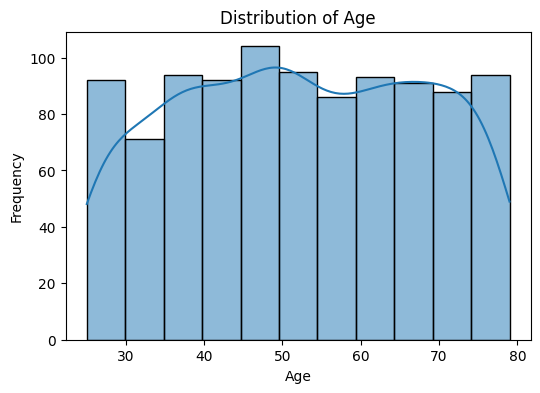

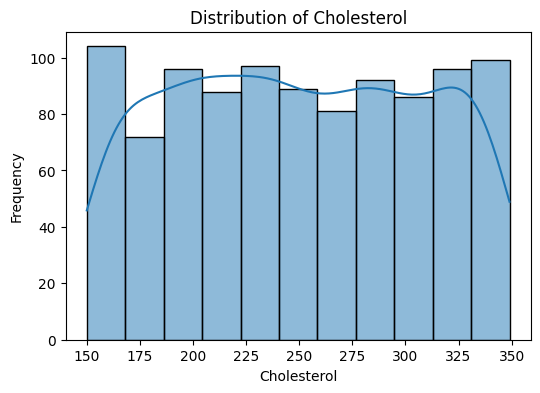

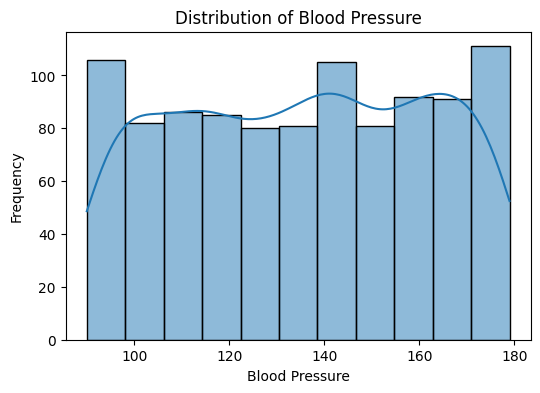

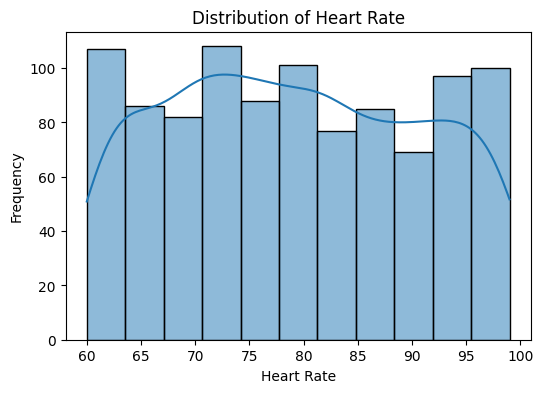

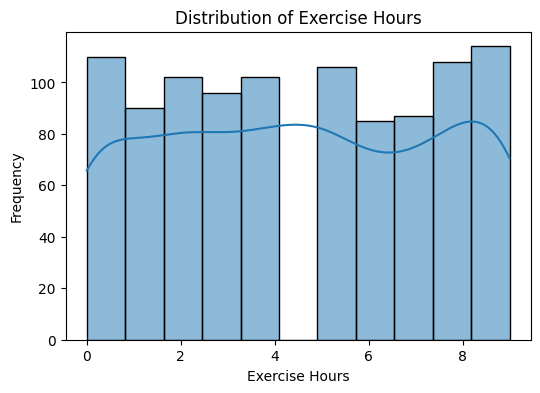

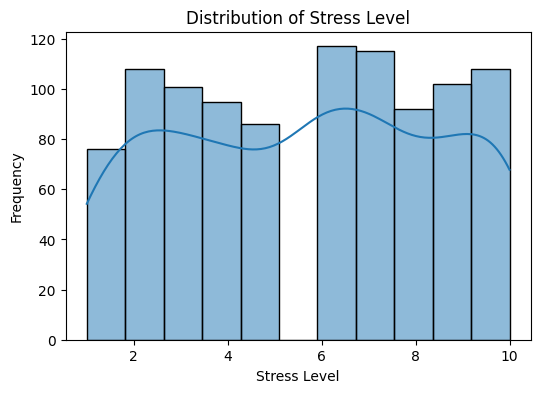

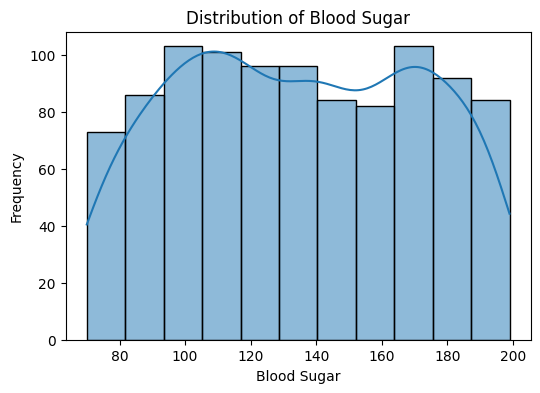

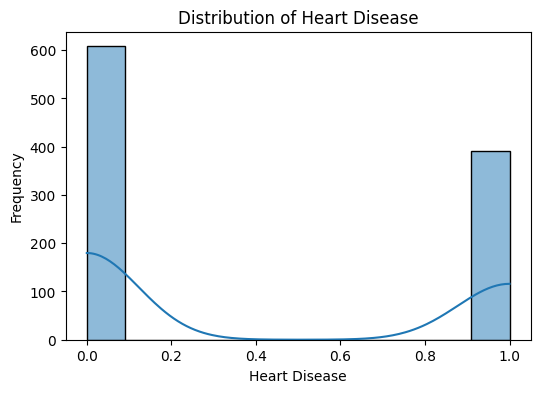

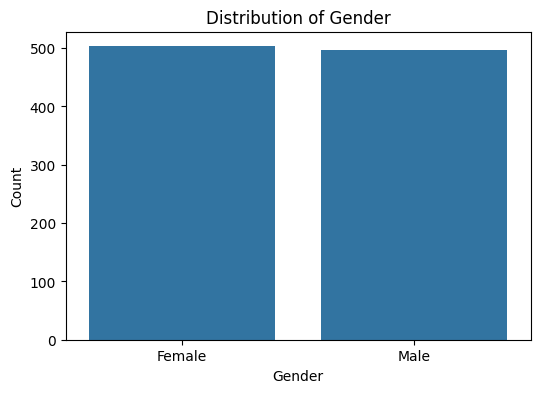

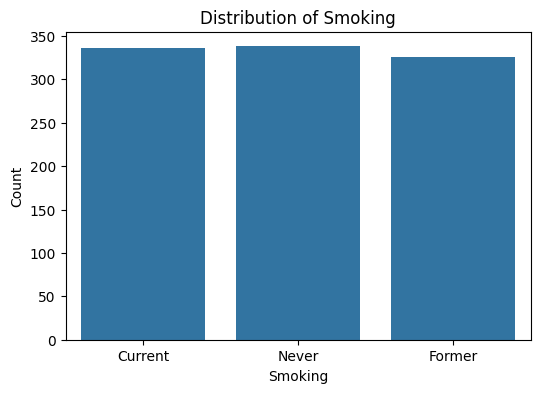

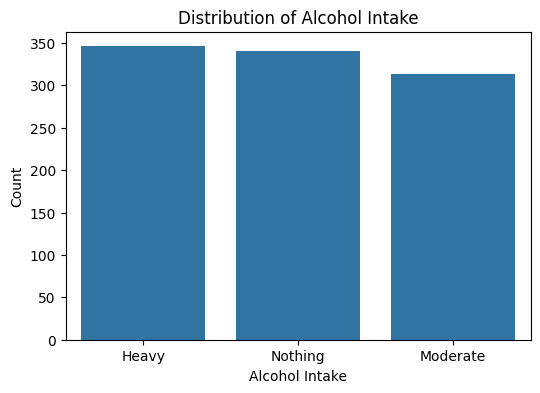

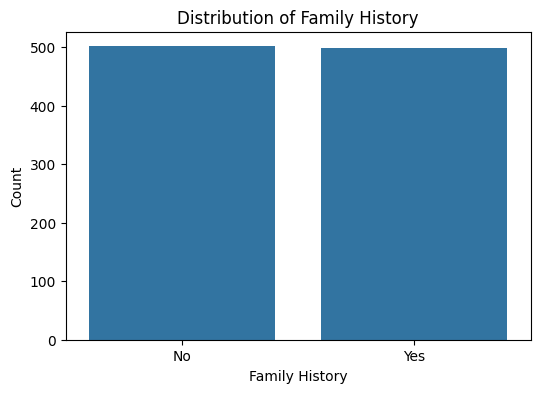

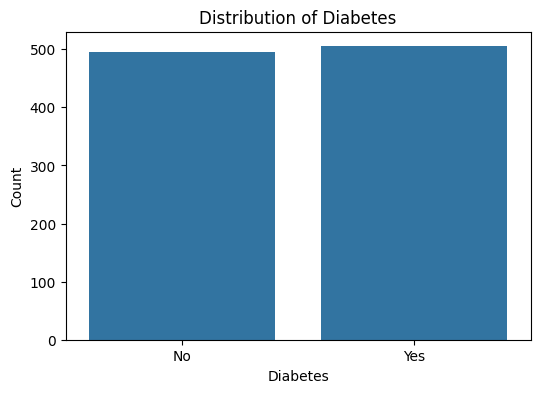

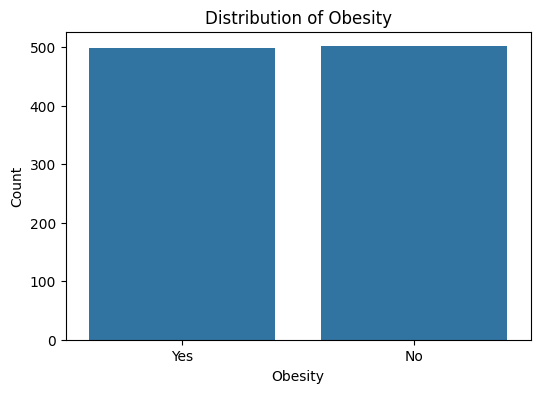

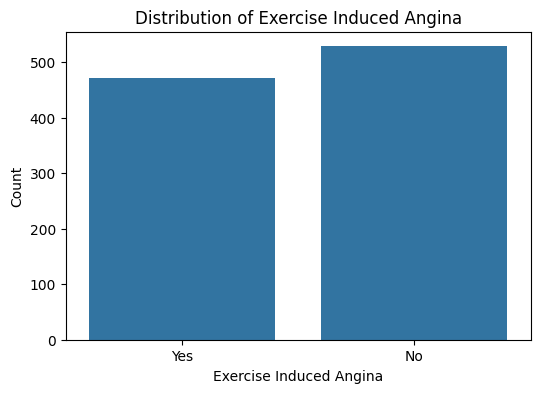

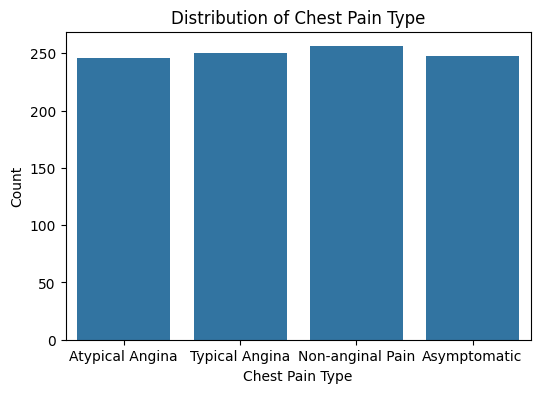

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Separtion between numerical features and categorial features.
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Plot numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Plot categorical features
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### Now let's check normallity for numerical features, using Shapiro-Wilk test

In [8]:
from scipy import stats

# Perform Shapiro-Wilk test on numerical features
for feature in numerical_features:
    data = df[feature].dropna()  # Drop missing values
    stat, p_value = stats.shapiro(data)
    print(f'Shapiro-Wilk test for {feature}:')
    print(f'  Test Statistic: {stat:.4f}, p-value: {p_value:.4f}')
    
    # Interpretation
    if p_value > 0.05:
        print(f'  {feature} appears to be normally distributed (fail to reject H0)')
    else:
        print(f'  {feature} does not appear to be normally distributed (reject H0)')


Shapiro-Wilk test for Age:
  Test Statistic: 0.9570, p-value: 0.0000
  Age does not appear to be normally distributed (reject H0)
Shapiro-Wilk test for Cholesterol:
  Test Statistic: 0.9533, p-value: 0.0000
  Cholesterol does not appear to be normally distributed (reject H0)
Shapiro-Wilk test for Blood Pressure:
  Test Statistic: 0.9515, p-value: 0.0000
  Blood Pressure does not appear to be normally distributed (reject H0)
Shapiro-Wilk test for Heart Rate:
  Test Statistic: 0.9551, p-value: 0.0000
  Heart Rate does not appear to be normally distributed (reject H0)
Shapiro-Wilk test for Exercise Hours:
  Test Statistic: 0.9304, p-value: 0.0000
  Exercise Hours does not appear to be normally distributed (reject H0)
Shapiro-Wilk test for Stress Level:
  Test Statistic: 0.9372, p-value: 0.0000
  Stress Level does not appear to be normally distributed (reject H0)
Shapiro-Wilk test for Blood Sugar:
  Test Statistic: 0.9593, p-value: 0.0000
  Blood Sugar does not appear to be normally distri

#### And none of them seem to be normally distributed.